In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# # scipy
# import scipy
# print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import matplotlib.pyplot as plt
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import pickle as pickle

# scikit-learn
# import sklearn
# print('sklearn: {}'.format(sklearn.__version__))
# import pandas.plotting
# import pickle as pickle
# import matplotlib.mlab as mlab
# import math
# from IPython.core.display import HTML
# from scipy.stats import moment

Python: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
numpy: 1.14.0
matplotlib: 2.1.2
pandas: 0.22.0


In [24]:
# Load libraries

# pd.options.mode.chained_assignment = None  # default='warn'
# from pandas.tools.plotting import scatter_matrix
# import matplotlib.pyplot as plt
# from sklearn import model_selection
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report,confusion_matrix,roc_curve
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

In [2]:
def pickle_data(filename, data):

    fileObject = open('PickleData/'+filename,'wb') 
    # this writes the object a to the
    # file named 'testfile'
    pickle.dump(data,fileObject) 

    # here we close the fileObject
    fileObject.close()
    
def load_pickle_data(filename):
    # we open the file for reading
    fileObject = open('PickleData/'+filename,'rb')  
    # load the object from the file into var b
    return pickle.load(fileObject)

In [3]:
# Read training set
df = pd.read_csv('Data/train.csv')

In [27]:
# Preview dataset
df.head(5)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


# Part 1: Data Exploration

### Overall Dataset

In [28]:
print('Number of impressions:', df.shape[0])
print('Number of impressions clicked through:', df[df['click']==1].shape[0])
print('Number of impressions NOT clicked through:', df[df['click']==0].shape[0])
print('Average click through rate:',round(df[df['click']==1].shape[0]*100/df.shape[0],2),'%')

Number of impressions: 2430981
Number of impressions clicked through: 1793
Number of impressions NOT clicked through: 2429188
Average click through rate: 0.07 %


In [29]:
print('Average bid price', round(sum(df['bidprice'])/df.shape[0],2))
print('Average pay price', round(sum(df['payprice'])/df.shape[0],2))

Average bid price 272.96
Average pay price 78.15


##### Clicked Impressions

In [30]:
print('Average bid price of impressions:', round(sum(df[df['click']==1]['bidprice'])/df[df['click']==1].shape[0],2))
print('Average pay price of impressions:', round(sum(df[df['click']==1]['payprice'])/df[df['click']==1].shape[0],2))

Average bid price of impressions: 273.23
Average pay price of impressions: 105.46


##### Not Clicked Impressions

In [7]:
print('Average bid price of impressions:', round(sum(df[df['click']==0]['bidprice'])/df[df['click']==0].shape[0],2))
print('Average pay price of impressions:', round(sum(df[df['click']==0]['payprice'])/df[df['click']==0].shape[0],2))

Average bid price of impressions: 272.96
Average pay price of impressions: 78.13


In [8]:
print('CPM:',sum(df['payprice'])/df.shape[0]*1000)

CPM: 78151.41623895867


In [9]:
num_clicks = df[(df['click']==1)].shape[0]
total_cost = df[(df['click'] == 1) ]['payprice']
cpc = round(sum(total_cost)/total_cost.shape[0],2)

num_blocks_mille = (df[(df['payprice']>0)].shape[0])/1000
ecpm = sum(total_cost)/num_blocks_mille
ecpc = sum(total_cost)/df[(df['click'] == 1)].shape[0]


print("CPC :", round(cpc,2))
print("eCPM :", round(ecpm,2))
print("eCPC :", round(ecpc,2))

CPC : 105.46
eCPM : 77.8
eCPC : 105.46


### Individual Advertisers

In [25]:
# Get all advertiser IDs
advertisers = df['advertiser'].unique()

for a in advertisers:
    
    total_price_paid = sum(df[df['advertiser']==a]['payprice'])
    total_num_imp = df[df['advertiser']==a].shape[0]
    cpm = total_price_paid/total_num_imp*1000
    
    print("Advertiser:", a)
    
    ## print('Number of impressions:',df.shape[0])
    print('Number of impressions:', df[df['advertiser']==a].shape[0])
    print('Number of impressions clicked through:', df[(df['click']==1)&(df['advertiser']==a)].shape[0])
    print('Number of impressions NOT clicked through:', df[(df['click']==0)&(df['advertiser']==a)].shape[0])
    print('Average click through rate:',round(df[(df['click']==1)&(df['advertiser']==a)].shape[0]*100/df[df['advertiser']==a].shape[0],2),'%')

    print('Average bid price', round(sum(df.loc[df['advertiser']==a]['bidprice'])/df[df['advertiser']==a].shape[0],2))
    print('Average pay price', round(sum(df.loc[df['advertiser']==a]['payprice'])/df[df['advertiser']==a].shape[0],2))
    
    print('Average bid price non-clicked', round(sum(df.loc[(df['click']==0)&(df['advertiser']==a)]['bidprice'])/df[(df['click']==0)&(df['advertiser']==a)].shape[0],2))
    print('Average pay price non-clicked:', round(sum(df.loc[(df['click']==0)&(df['advertiser']==a)]['payprice'])/df[(df['click']==0)&(df['advertiser']==a)].shape[0],2))
    
    print('Average bid price clicked', round(sum(df.loc[(df['click']==1)&(df['advertiser']==a)]['bidprice'])/df[(df['click']==1)&(df['advertiser']==a)].shape[0],2))
    print('Average pay price clicked:', round(sum(df.loc[(df['click']==1)&(df['advertiser']==a)]['payprice'])/df[(df['click']==1)&(df['advertiser']==a)].shape[0],2))
    
    print("CPM :", round(cpm,2))
    
    num_clicks = df[(df['advertiser']==a) & (df['click']==1)].shape[0]
    total_cost = df[(df['click'] == 1) & (df['advertiser']==a)]['payprice']
    cpc = round(sum(total_cost)/total_cost.shape[0],2)
    
    num_blocks_mille = (df[(df['advertiser']==a) & (df['payprice']>0)].shape[0])/1000
    ecpm = sum(total_cost)/num_blocks_mille
    ecpc = sum(total_cost)/df[(df['advertiser'] == a) & (df['click'] == 1)].shape[0]
    
    
#     total_price_paid = sum(df[df['advertiser']==a]['payprice'])
#     total_num_imp = df[df['advertiser']==a].shape[0]
#     cpm = total_price_paid/total_num_imp*1000
    
    print("CPC :", round(cpc,2))
    print("eCPM :", round(ecpm,2))
    print("eCPC :", round(ecpc,2))
    
    print('-----------------------------')
    

Advertiser: 3427
Number of impressions: 402806
Number of impressions clicked through: 272
Number of impressions NOT clicked through: 402534
Average click through rate: 0.07 %
Average bid price 236.39
Average pay price 75.62
Average bid price non-clicked 236.39
Average pay price non-clicked: 75.6
Average bid price clicked 235.05
Average pay price clicked: 103.53
CPM : 75616.33
CPC : 103.53
eCPM : 69.91
eCPC : 103.53
-----------------------------
Advertiser: 2821
Number of impressions: 211366
Number of impressions clicked through: 131
Number of impressions NOT clicked through: 211235
Average click through rate: 0.06 %
Average bid price 290.22
Average pay price 89.08
Average bid price non-clicked 290.22
Average pay price non-clicked: 89.06
Average bid price clicked 290.76
Average pay price clicked: 119.84
CPM : 89077.92
CPC : 119.84
eCPM : 74.27
eCPC : 119.84
-----------------------------
Advertiser: 1458
Number of impressions: 492353
Number of impressions clicked through: 385
Number of i

## Visualisations 

##### Grouping User Agents together by Device Type

In [12]:
df['platform'] = df['useragent'].map(lambda x: str(x).split('_')[0])   
df['browser'] = df['useragent'].map(lambda x: str(x).split('_')[1])

In [10]:
# Save as data pickle for future use
pickle_data('Q1-plots', df)

In [36]:
# Load data pickle
df = load_pickle_data('Q1-plots')

In [37]:
# Returns data frame for boxplots - Parameters: select platform, show all or only clicked
def boxplot_setup_platforms(platform, clicked):
    
    if (clicked):
        temp_df = df[(df['platform']== platform) & (df['click'])]['payprice']
    else:
        temp_df = df[(df['platform']== platform)]['payprice']
        
    return temp_df

# Plot boxplot of Pay Price for given USer Platforms
def boxplot_plot_platforms(clicked=0):

    # Select plotting data by platform
    data_to_plot = [boxplot_setup_platforms('windows',clicked),boxplot_setup_platforms('mac',clicked),boxplot_setup_platforms('linux',clicked),boxplot_setup_platforms('ios',clicked),boxplot_setup_platforms('android',clicked),boxplot_setup_platforms('other',clicked)]


    # figure related code
    fig = plt.figure(figsize=(10,10))

    title = 'Pay Price by User Platforms (Clicked)' if clicked==1 else 'Pay Price by User Platforms'
    
    fig.suptitle(title, fontsize=14)

    # plt.boxplot(data_to_plot)

    ax = fig.add_subplot(111)
    ax.boxplot(data_to_plot)

    ax.set_xlabel('Platforms')
    ax.set_ylabel('Pay Price')

    # add x-tick labels
    plt.xticks([1, 2, 3, 4, 5, 6], ['Windows', 'Mac', 'Linux', 'iOS', 'Android', 'Other'])

    plt.show()

In [38]:
# Set to all impressions, not just clicked ones
clicked = 0

# Generate data to plot
data_to_plot = [boxplot_setup_platforms('windows',clicked),boxplot_setup_platforms('mac',clicked),boxplot_setup_platforms('linux',clicked),boxplot_setup_platforms('ios',clicked),boxplot_setup_platforms('android',clicked),boxplot_setup_platforms('other',clicked)]

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


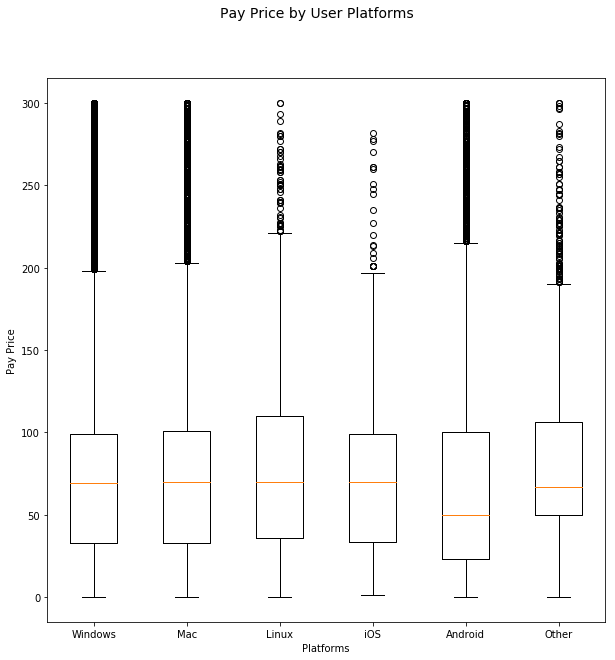

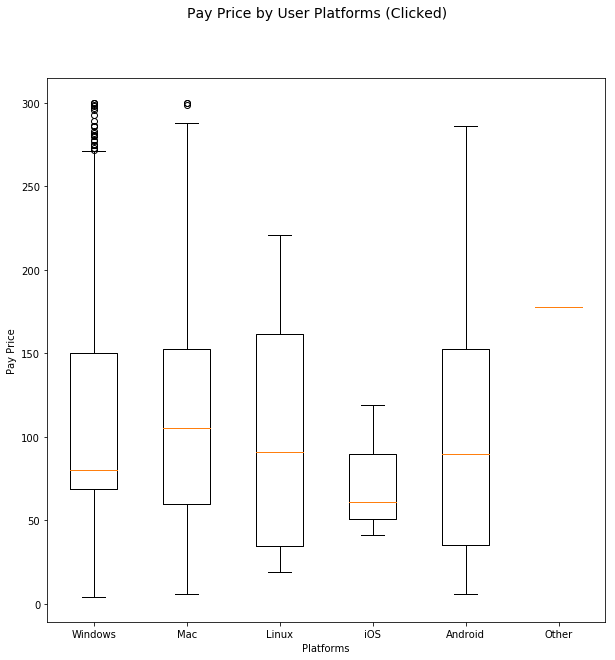

In [39]:
#Plot graphs
boxplot_plot_platforms(clicked=0)
boxplot_plot_platforms(clicked=1)

##### Pay price by days of week

In [5]:
d = {'weekday': ['Fri','Sat','Sun','Mon','Tue','Wed','Thu']}
# d = {'weekday': [0,1,2,3,4,5,6]}
df_weekdays = pd.DataFrame(data=d)
df_weekdays['payprice'] = df.loc[df['weekday'] == 0,['payprice']]

In [6]:
# Get average pay price for each day of the week
for i in range(0, 7):

    df_tmp = df.loc[df['weekday'] == i,['payprice']]
    df_weekdays['payprice'][i] = round(df_tmp.sum()/df_tmp.shape[0],2)


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
df_weekdays

,weekday,payprice
0,Fri,76.50
1,Sat,82.26
2,Sun,80.04
3,Mon,76.54
4,Tue,77.66
5,Wed,79.80
6,Thu,74.52


In [8]:
# Changed order of rows to match Mon-Sun
df_weekdays = df_weekdays.reindex([3, 4, 5, 6, 0, 1, 2])
df_weekdays = df_weekdays.reset_index(drop=True)

In [9]:
df_weekdays = df_weekdays.set_index('weekday')

In [10]:
df_weekdays = df_weekdays.reset_index(drop=True)

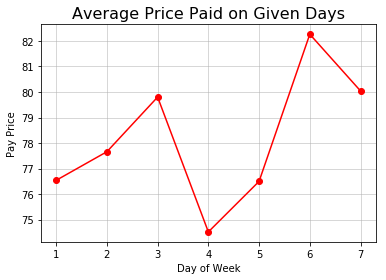

In [12]:
y = df_weekdays['payprice']

plt.xlabel('Day of Week')
plt.ylabel('Pay Price')
plt.title('Average Price Paid on Given Days', fontsize=16)
plt.grid( linestyle='-', linewidth=0.5)
plt.plot([1, 2, 3, 4, 5, 6,7], y, linestyle='-', marker='o', color='r')

plt.show()

##### Price aid by advertisers 

In [18]:
# Add average payprice column grouped by weekday
df['avg_payprice'] = df.groupby(['weekday','advertiser'])['payprice'].transform('mean')

In [19]:
df_weekdays_advertisers = df[['avg_payprice', 'weekday', 'advertiser']].copy()

In [20]:
# Drop duplicates to remain with single row for each weekday
df_weekdays_advertisers.drop_duplicates(subset=['weekday', 'advertiser'], keep="last", inplace=True)

In [21]:
# Create dictionary to store dataframes for each advertiser
advertisers = {}

# for a in df_weekdays_advertisers['advertiser'].unique():
for a in [3358,3386,3427,3476,1458]:
    tmp_ad = df_weekdays_advertisers.loc[df_weekdays_advertisers['advertiser']==a]; # update existing entry
    
    # Sort values ascending weekday
    tmp_ad = tmp_ad.sort_values(['weekday'], ascending=[True])
    tmp_ad = tmp_ad.reset_index(drop=True)
    # Changed order of rows to match Mon-Sun
    tmp_ad = tmp_ad.reindex([3, 4, 5, 6, 0, 1, 2])
    tmp_ad = tmp_ad.reset_index(drop=True)

    advertisers[a] = tmp_ad

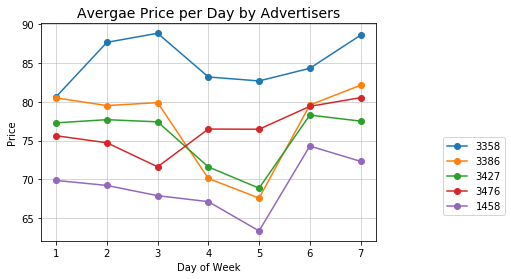

In [22]:
# Plot Pay Price by Week 

# zipped_x, zipped_y = zip(*sorted(zip(df_weekdays.index, df_weekdays['payprice'])))
x = tmp_ad['weekday']
y = tmp_ad['avg_payprice']

plt.xlabel('Day of Week')
plt.ylabel('Price')
plt.title('Avergae Price per Day by Advertisers', fontsize=14)
plt.grid( linestyle='-', linewidth=0.5)

for ad in advertisers:
#     x = ad['weekday']
#     y = ad['avg_payprice']
    x = advertisers[ad]['weekday']
    y = advertisers[ad]['avg_payprice']
    plt.plot([1,2,3,4,5,6,7], y, linestyle='-', marker='o',label=ad)
# plt.plot(x, y+1, linestyle='-', marker='o')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.5))

##### Further notable exploration

In [30]:
# How many has pay price 0
print('Num rows pay price of zero:',df.loc[df['payprice']==0].shape[0])

Num rows pay price of zero: 487


In [27]:
# How many pay price 0 has advertiser 2261
df.loc[(df['payprice']==0) & (df['advertiser']==2261)].shape[0]

463

In [31]:
# How many rows in whole dataframe?
df.shape[0]

2430981

In [33]:
print('Advertisers:',df['advertiser'].unique())

Advertisers: [3427 2821 1458 2259 3386 3358 3476 2261 2997]
